# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [4]:
# Libraries.
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [5]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

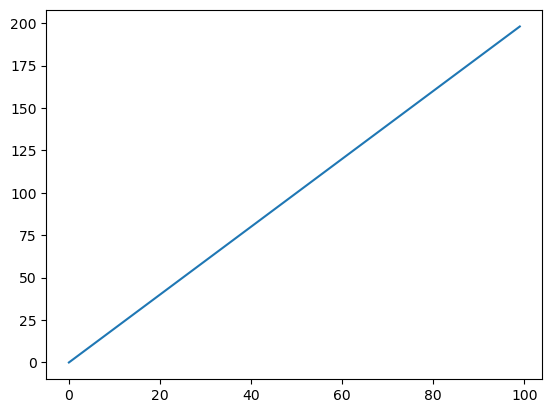

In [6]:
# Method 1 
plt.plot(x, y)


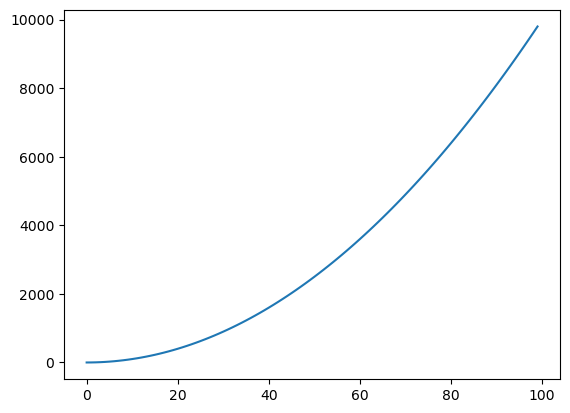

In [7]:
plt.plot(x, z)

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

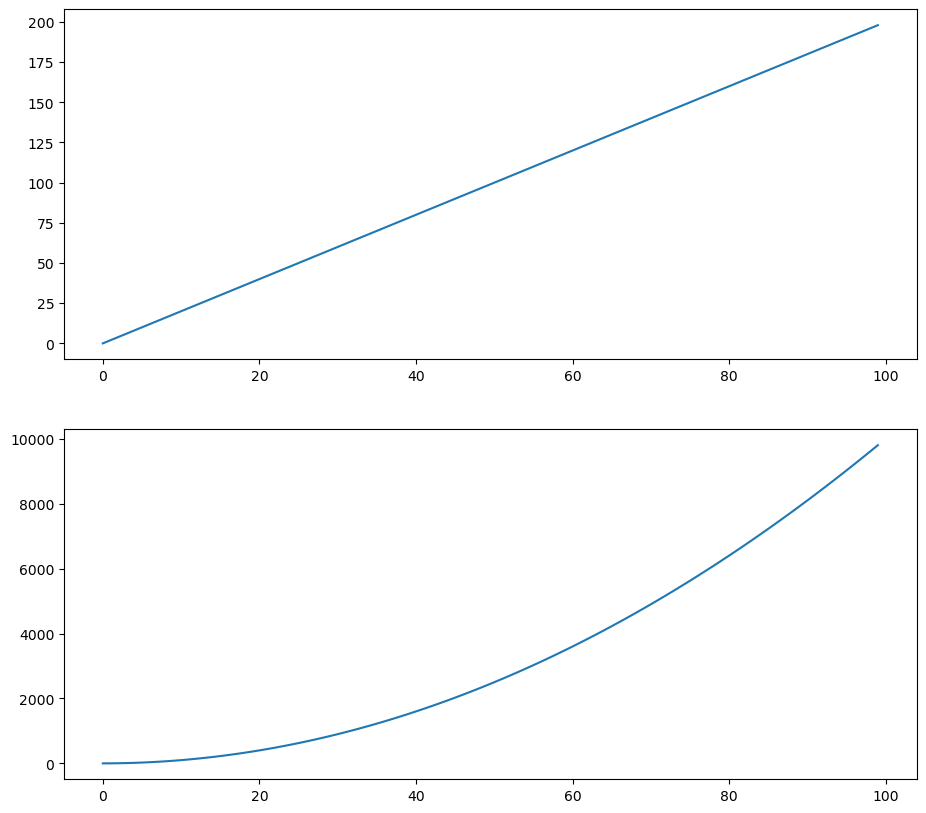

In [13]:
# Method 2
fig, axs = plt.subplots(ncols=1,
                        nrows=2,
                        figsize=(11,10))
axs[0].plot(x,y)
axs[1].plot(x,z)


#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

Text(0, 0.5, 'eje y')

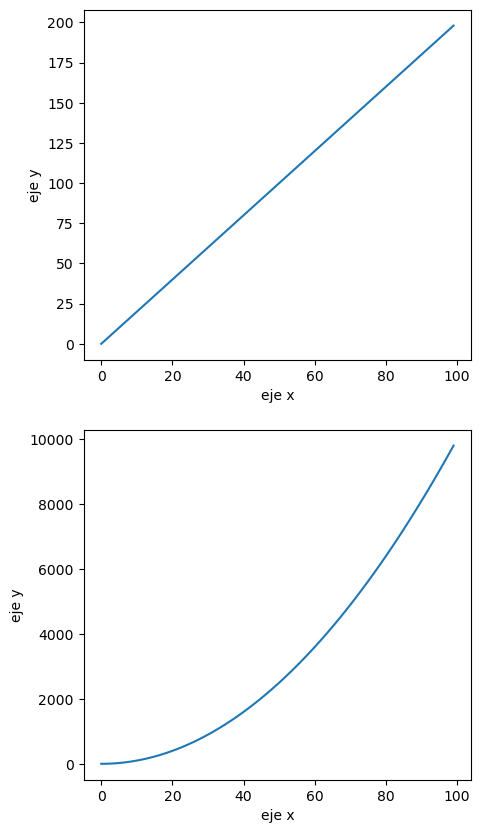

In [21]:
# your code here
fig, axs = plt.subplots(ncols=1,
                        nrows=2,
                        figsize=(5,10))

axs[0].plot(x,y)
axs[1].plot(x,z)
#renombrar los ejes
axs[0].set_xlabel('eje x')
axs[0].set_ylabel('eje y')

axs[1].set_xlabel('eje x')
axs[1].set_ylabel('eje y')

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

In [24]:
# your code here
x = np.arange(0,100)
y_ex1 = x*2
y_ex2 = np.exp(x)

Text(0, 0.5, 'eje y')

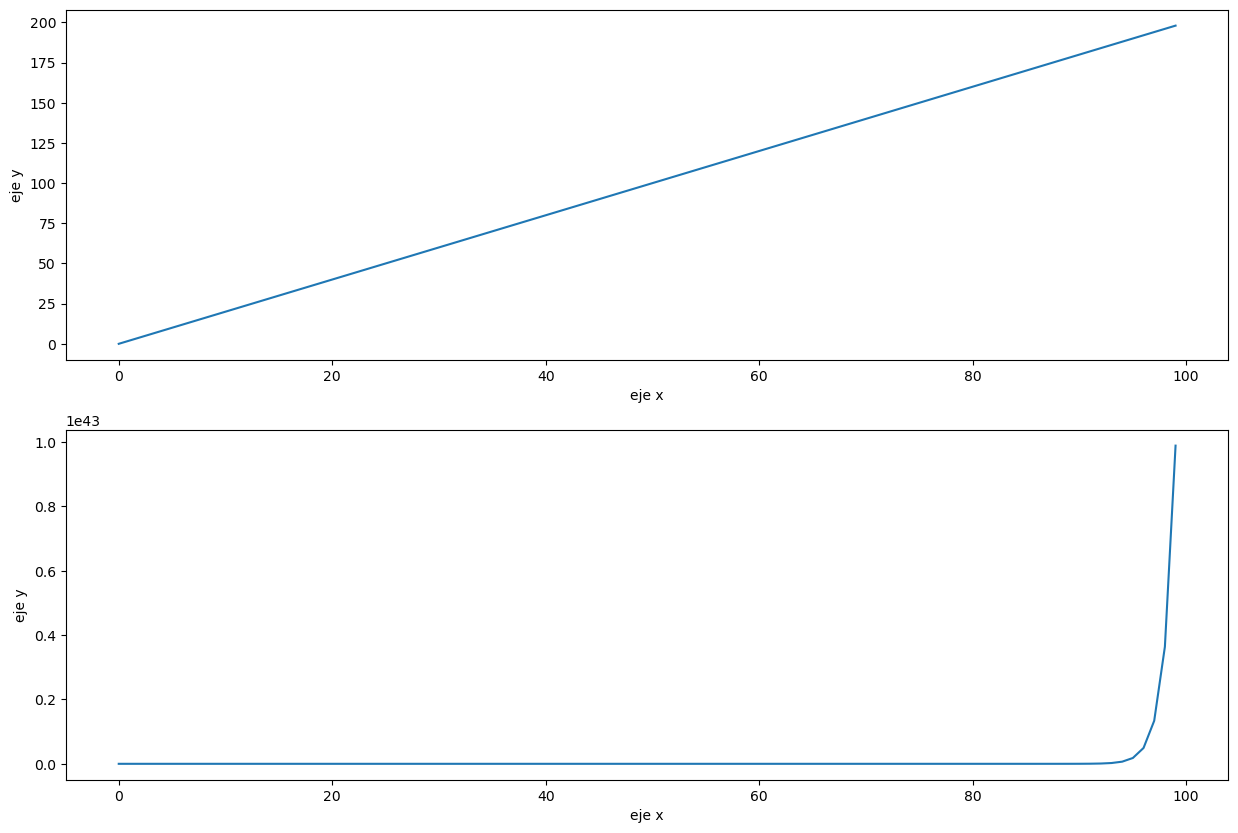

In [30]:
fig, axs = plt.subplots(ncols=1,
                        nrows=2,
                        figsize=(15,10))
axs[0].plot(x, y_ex1)
axs[1].plot(x, y_ex2)
#renombrar los ejes
axs[0].set_xlabel('eje x')
axs[0].set_ylabel('eje y')

axs[1].set_xlabel('eje x')
axs[1].set_ylabel('eje y')

#### As a bonus challenge, try to add a legend to the plot.

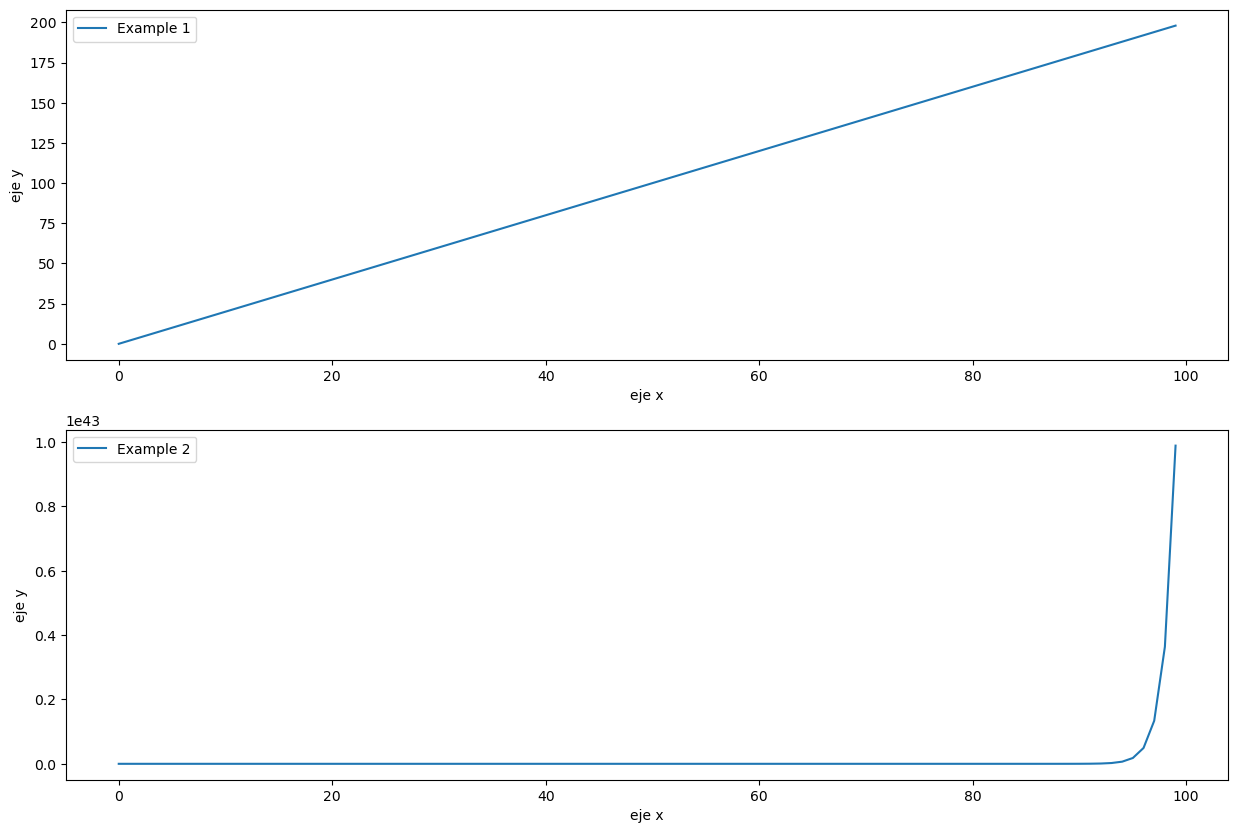

In [32]:
# your code here
fig, axs = plt.subplots(ncols=1,
                        nrows=2,
                        figsize=(15,10))
axs[0].plot(x, y_ex1, label='Example 1')
axs[1].plot(x, y_ex2, label='Example 2')
#renombrar los ejes
axs[0].set_xlabel('eje x')
axs[0].set_ylabel('eje y')
axs[0].legend()

axs[1].set_xlabel('eje x')
axs[1].set_ylabel('eje y')
axs[1].legend()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [40]:
# your code here
fitbit = pd.read_csv('../data/fitbit2.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


In [41]:
fitbit.info()
#fitbit.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

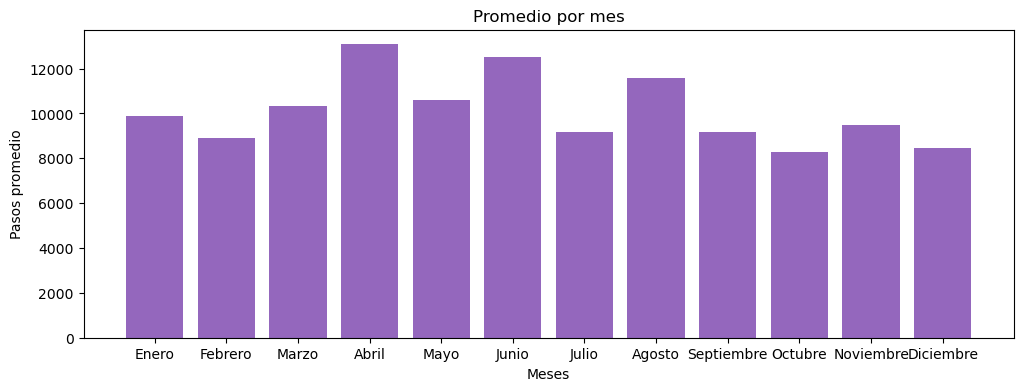

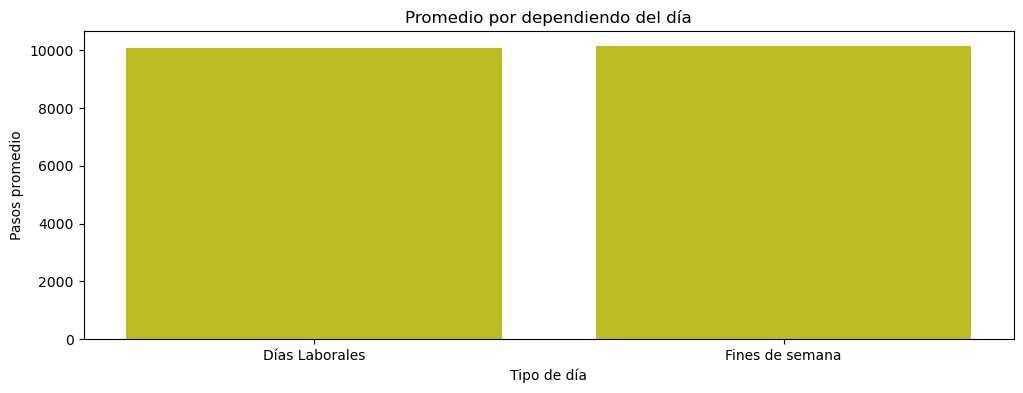

In [62]:
# MEDIAN STEPS BY MONTH_ENCODED
mean_month = fitbit.groupby('Months_encoded')['Steps'].mean()
# your code here
plt.figure(figsize=(12,4))
months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.bar(months, mean_month, color='tab:purple' )
plt.title('Promedio por mes')
plt.xlabel('Meses')
plt.ylabel('Pasos promedio')
plt.savefig('../data/months.png')
# MEDIAN STEPS BY WORK_OR_WEEKEND
mean_work_weekend = fitbit.groupby('Work_or_Weekend')['Steps'].mean()
# your code here
plt.figure(figsize=(12,4))
weekend = ['Días Laborales', 'Fines de semana']
plt.bar(weekend, mean_work_weekend, color='tab:olive')
plt.title('Promedio por dependiendo del día')
plt.xlabel('Tipo de día')
plt.ylabel('Pasos promedio')
plt.savefig('../data/weekend.png')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [99]:
#loop de 3 diagramas dispares:
features = ['Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Very Active']
fig, ax = plt.subplots()
for 

['Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Very Active']

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [67]:
# your code here
titanic = pd.read_csv('../data/titanic.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### Explore the titanic dataset using Pandas dtypes.

In [64]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [68]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include=['int64','float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 71.7 KB


In [70]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      1309 non-null   object
 1   Gender    1309 non-null   object
 2   Ticket    1309 non-null   object
 3   Cabin     1309 non-null   object
 4   Embarked  1309 non-null   object
dtypes: object(5)
memory usage: 51.3+ KB


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [72]:
# your code here 
#tipos de estilos 
plt.style.available

['Solarize_Light2',
 '_classic_test',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

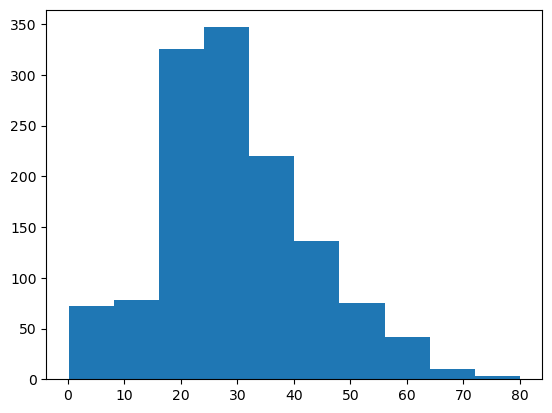

In [73]:
# your code here
titanic['Age']
titanic['Age'].value_counts()
pd.set_option('display.max_rows', 500)
plt.hist(titanic['Age'])

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

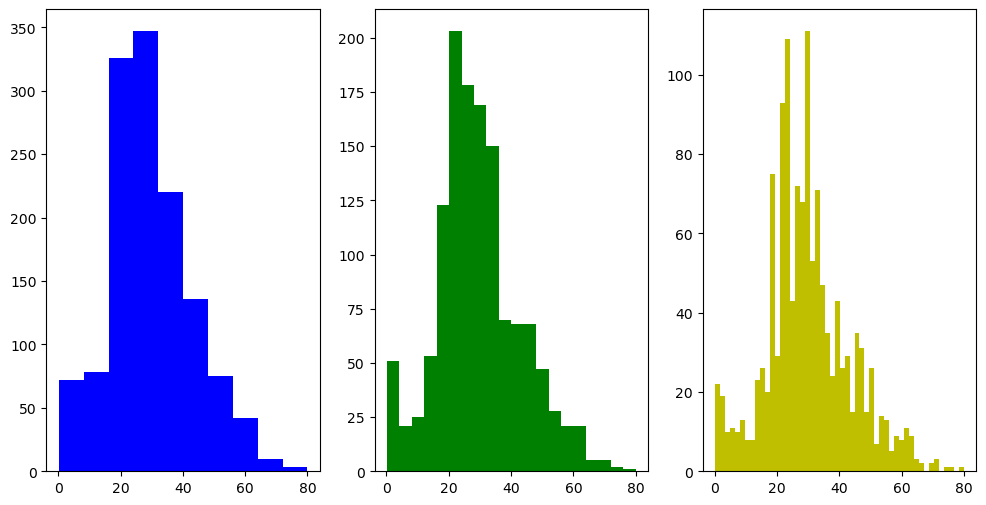

In [76]:
# your code here
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,6))
axs[0].hist(titanic['Age'], bins=10, color='b')
axs[1].hist(titanic['Age'], bins=20, color='g')
axs[2].hist(titanic['Age'], bins=50, color='y')
plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
"""

#### Use seaborn to show the distribution of column `Age`.

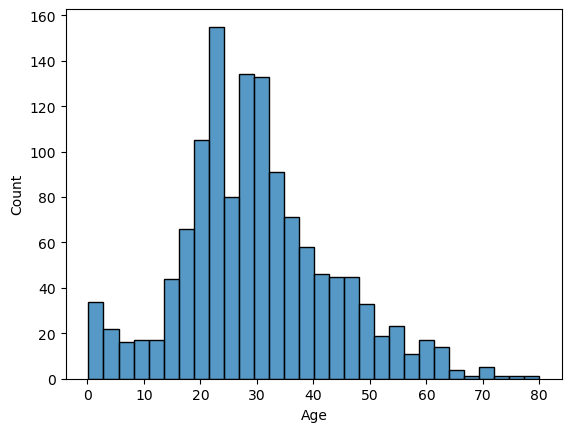

In [77]:
# your code here
sns.histplot(titanic['Age'])
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

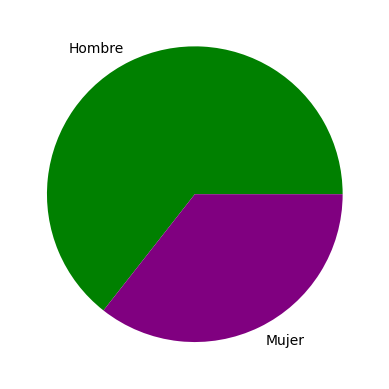

In [81]:
# Method 1 - matplotlib
# your code here
#titanic['Gender'].value_counts()
the_labels = ['Hombre', 'Mujer']
the_color = ['green', 'purple']
fig, ax = plt.subplots()
ax.pie(titanic['Gender'].value_counts(), labels=the_labels, colors=the_color)
plt.show()

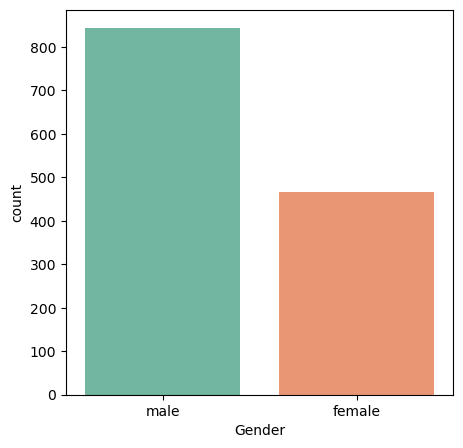

In [84]:
# Method 2 - seaborn
# your code here
plt.figure(figsize=(5,5))
sns.countplot(x=titanic['Gender'], palette = "Set2")
plt.show()

#### Use the right plot to visualize the column `Pclass`.

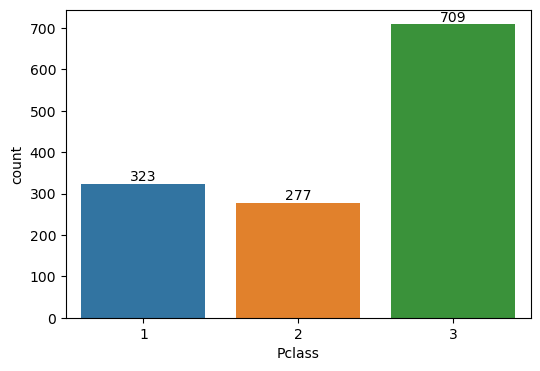

In [87]:
# your code here
#titanic['Pclass']
plt.figure(figsize=(6,4))
ax = sns.countplot(x=titanic['Pclass']) 
ax.bar_label(ax.containers[0])    
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

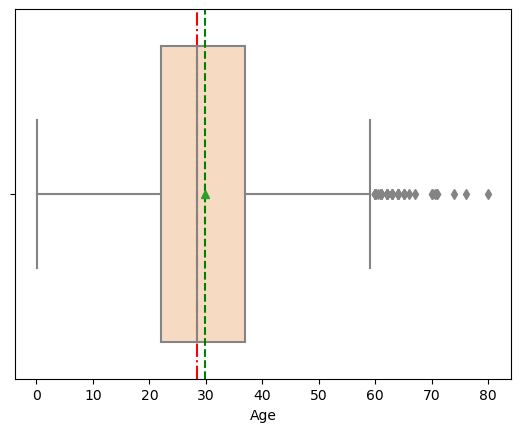

In [93]:
# your code here
ay = sns.boxplot(x=titanic['Age'], showmeans=True, color='peachpuff')
ay.axvline(x=titanic['Age'].median(), color='r', linestyle='-.', label='Median')
ay.axvline(x=titanic['Age'].mean(), color='g', linestyle='dashed', label='Mean')
ax.legend()
plt.show()

In [ ]:
"""

"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

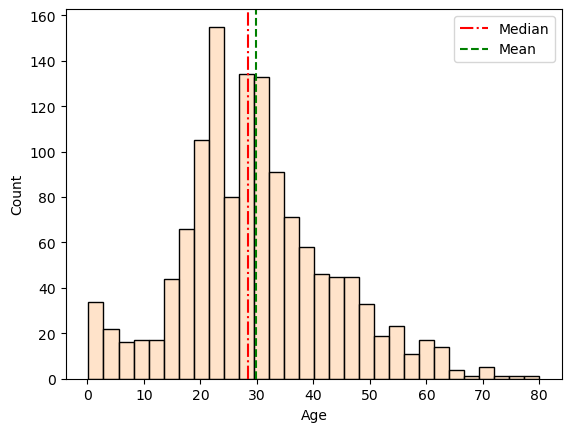

In [94]:
# your code here
ax = sns.histplot(x=titanic['Age'], color='peachpuff')
ax.axvline(x=titanic['Age'].median(), color='r', linestyle='-.', label='Median')
ax.axvline(x=titanic['Age'].mean(), color='g', linestyle='dashed', label='Mean')
ax.legend()

plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

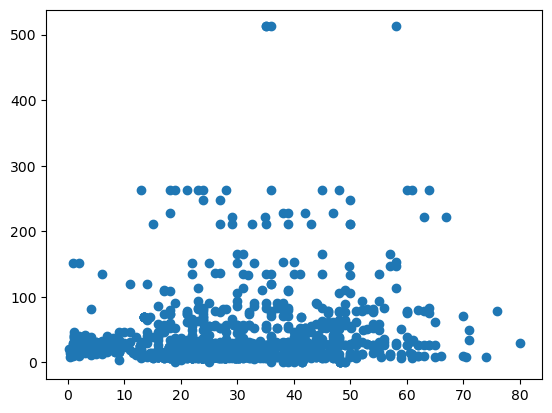

In [95]:
# Method 1 - matplotlib
# your code here
plt.scatter(data=titanic, x='Age', y='Fare')

plt.show()

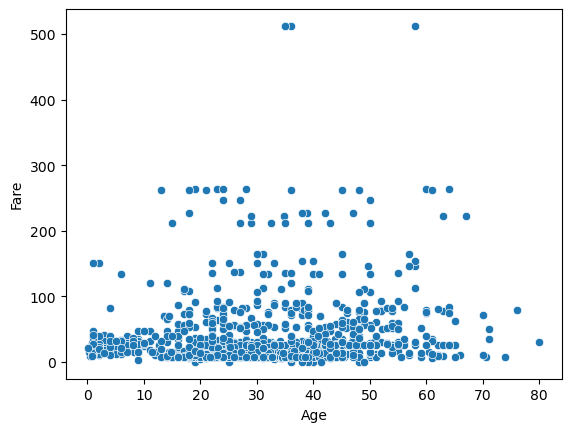

In [96]:
# Method 2 - seaborn
# your code here
sns.scatterplot(data=titanic, x='Age', y='Fare')

plt.show()

#### Plot the correlation matrix using seaborn.

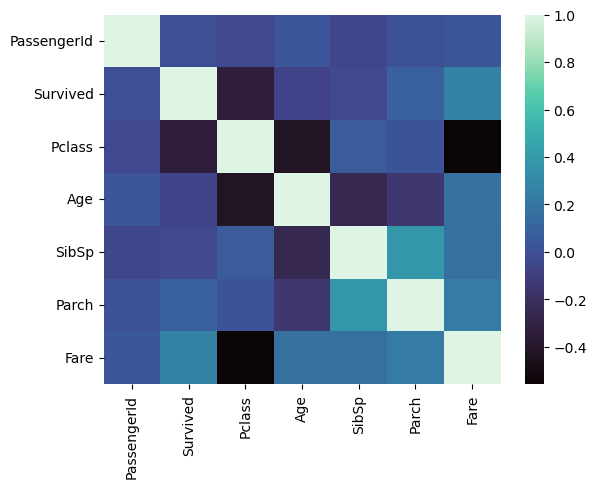

In [97]:
# your code here
corr = titanic.corr(numeric_only=True)
sns.heatmap(corr, cmap = "mako")
plt.show()

#### What are the most correlated features?

In [ ]:
"""
Pclass y Age, Fare y Pclass, Pclass y Fare
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

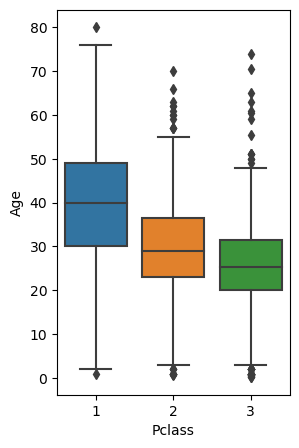

In [98]:
# your code here
plt.figure(figsize=(3,5))

sns.boxplot(data=titanic, x='Pclass', y='Age')
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here